In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

from data_analysis_codes.tools import Amplitudes as A
from data_analysis_codes.tools import EdS
EdS = EdS.evo()

from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
import math

In [2]:
def dichotomy(y_wanted, function, lower_bound, upper_bound, tolerance):
    x_low = lower_bound
    x_upp = upper_bound
    x_mid = (x_low + x_upp) / 2
    y_low = function(x_low)
    y_upp = function(x_upp)
    y_mid = function(x_mid)
    while abs(y_wanted / y_mid - 1) > tolerance:
        if y_wanted > y_mid:
            y_low = y_mid
            x_low = x_mid
            x_mid = (x_low + x_upp) / 2
            y_mid = function(x_mid)
        else:
            y_upp = y_mid
            x_upp = x_mid
            x_mid = (x_low + x_upp) / 2
            y_mid = function(x_mid)
    return x_mid

In [3]:
# Previously in paper
tINprev = 1
lambda_pertprev = 1206
Amp_pertprev = 0.01068203445570103244
output = A.f_Amp(tINprev, [lambda_pertprev]*3, [Amp_pertprev]*3)
print('deltaODIN = ', output['deltaOD'], '  nonlin = ', abs(output['deltaOD']/output['delta1OD'] - 1))

deltaTA = 3*((6*np.pi)**(2/3))/20
aTA = EdS.a(tINprev) * deltaTA / output['deltaOD']
tTA = EdS.t_func_a(aTA)
print('tTA =', tTA)

deltaF = 3*((12*np.pi)**(2/3))/20
aF = EdS.a(tINprev) * deltaF / output['deltaOD']
tF = EdS.t_func_a(aF)
print('zIN = ', EdS.z(tINprev), 'zF = ', EdS.z(tF))

print('tIN =', tINprev, '  tTA =', tTA, '  tF =', tF)
print(output)
paramprev = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS')
Lin = LinData.LinData_Class(paramprev)
fprev = pd.read_table(paramprev['datapath']+'h5_data.csv', delimiter=',')
Lin.delta_initial['OD'] = fprev['drho_OD'][0]

deltaODIN =  0.03000000000000025   nonlin =  0.10100085090658872
tTA = 210.7444419312192
zIN =  205.46172764896136 zF =  2.672671968975387
tIN = 1   tTA = 210.7444419312192   tF = 421.48888386243834
{'Mom_max': 0.000145952740806895, 'Mom_Q3': 3.67910401367188e-05, 'Mom_med': 2.0724704172199853e-05, 'Mom_Q1': 9.046862919194526e-06, 'Mom_min': 1.372379185859321e-23, 'TotMass': 2.209325660334571e+20, 'deltaOD': 0.03000000000000025, 'delta1OD': 0.03337044315364872, 'MassOD': 923227872364147.4, 'gxxOD': 2.4441288618552918e-05, 'gdetOD': 1.460065363391338e-14, 'dgdetOD': 0.13086207943868788, 'dgdetOD1': 0.12553573389532116, 'RicciSOD': 0.13663848194719494, 'RicciSOD1': 0.1483130806828832, 'KOD': -1.9786465771024415, 'KxxOD': -1.6120224021690865e-05, 'dKOD': -0.010676711448779241, 'dKOD1': -0.011123481051216239}
 read time file


In [4]:
# Repeat sim with L=800
Lf1 = 800
tINf1 = 0.2918959286843883
Amp_pertf1 = 0.010682034395546127

deltaODIN = 0.02999999984881696
nonlin = 0.10100085037441231

zIN = 468.1958895544446 
zF = 7.3463535952338415

tIN = 0.2918959286843883 
tTA = 61.51544505759174 
tF = 123.03089011518348

dtfac = 0.00026401986749502915
output = A.f_Amp(tINf1, [Lf1]*3, [Amp_pertf1]*3)
print(output)

param_case1TV_N64 = RRead.read_parameters('pflrw_d3e2_L800_t3e1_N64_EdS_TV')
f1TV_N64 = pd.read_table(param_case1TV_N64['datapath']+'h5_data.csv', delimiter=',')

{'Mom_max': 6.42240384525396e-05, 'Mom_Q3': 1.61892758085669e-05, 'Mom_med': 9.11955603176049e-06, 'Mom_Q1': 3.980919224598797e-06, 'Mom_min': 1.5859805928971255e-23, 'TotMass': 6.448931653903956e+19, 'deltaOD': 0.02999999984881696, 'delta1OD': 0.033370442965726124, 'MassOD': 269486457060059.4, 'gxxOD': 4.732545696810624e-06, 'gdetOD': 1.0599477283634104e-16, 'dgdetOD': 0.13086207867134148, 'dgdetOD1': 0.12553573318837802, 'RicciSOD': 1.6036771861325136, 'RicciSOD1': 1.740697791713571, 'KOD': -6.7786028607383155, 'KxxOD': -1.06933492663251e-05, 'dKOD': -0.010676711391069071, 'dKOD1': -0.011123480988575374}


 Now I want

In [5]:
L = 800
prev_ratio = 1
tIN_wanted = ((3 * (EdS.t_today**(2/3)) * prev_ratio)/(2 * EdS.a_today * L))**(-3)
print(tIN_wanted, EdS.a(tIN_wanted)/ f1TV_N64['a'][0], Lin.an_initial(tIN_wanted))

17.2376283280362 15.164670669715957 6.672957234706933


In [6]:
def L_interp(x, y, xf):
    yf = np.zeros(len(xf))
    k = len(x)
    for i in range(len(xf)):
        for j in range(k):
            topbot = 1
            for m in range(k):
                if (j!=m 
                    and (xf[i]-x[m] not in [math.nan, math.inf, -math.inf]) 
                    and (x[j]-x[m] not in [math.nan, math.inf, -math.inf])):
                    topbot *= (xf[i]-x[m])/(x[j]-x[m])
            yf[i] += y[j]*topbot
    return yf

In [7]:
deltaIN_wanted = L_interp(f1TV_N64['t'], f1TV_N64['drho_u_OD'], [tIN_wanted])
print(deltaIN_wanted)

[0.70660668]


(-1.0, 17.0)

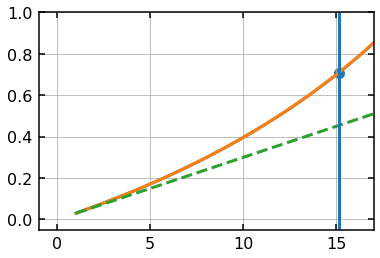

In [8]:
plt.plot(Lin.an_initial(fprev['t']), fprev['drho_OD'])
plt.plot(EdS.a(f1TV_N64['t'])/EdS.a(f1TV_N64['t'][0]), f1TV_N64['drho_u_OD'])
plt.plot(Lin.an_initial(fprev['t']), Lin.delta_u(fprev['t'], loc='OD'), linestyle='--')
plt.scatter(EdS.a(tIN_wanted)/EdS.a(f1TV_N64['t'][0]), deltaIN_wanted, s=100)
plt.axvline(x = EdS.a(tIN_wanted)/ f1TV_N64['a'][0])
plt.grid()
plt.ylim(-0.05, 1)
plt.xlim(-1, 17)

In [9]:
tIN = tIN_wanted
L = 800
def func(Amp_pert):
    return A.f_Amp(tIN, [L]*3, [Amp_pert]*3)['deltaOD']
Amp_pert = dichotomy(deltaIN_wanted, func, 1e-10, 0.1, 1e-8)
print(tIN, L, Amp_pert)
output = A.f_Amp(tIN, [L]*3, [Amp_pert]*3)
output

17.2376283280362 800 0.008003336841967575


{'Mom_max': 0.0008124247509650085,
 'Mom_Q3': 0.0001916648532371662,
 'Mom_med': 9.713529937022545e-05,
 'Mom_Q1': 4.417469693135515e-05,
 'Mom_min': 0.0,
 'TotMass': 6.259184829243918e+19,
 'deltaOD': 0.7066066766170842,
 'delta1OD': 0.37915088889064225,
 'MassOD': 297773550301988.8,
 'gxxOD': 0.0008307354717186444,
 'gdetOD': 5.733083466861886e-10,
 'dgdetOD': -0.4970607172961383,
 'dgdetOD1': -0.6142417146258681,
 'RicciSOD': 0.008967350883740954,
 'RicciSOD1': 0.0056711944150477,
 'KOD': -0.09758620997150855,
 'KxxOD': -2.7022775391305278e-05,
 'dKOD': -0.15892259128471764,
 'dKOD1': -0.12638362963021407}

In [11]:
nonlin = output['deltaOD']/output['delta1OD'] - 1
print('nonlin = ', nonlin)
deltaF = 3*((12*np.pi)**(2/3))/20
aF = EdS.a(tIN) * deltaF / output['deltaOD']
tF = EdS.t_func_a(aF)
print('zIN =', EdS.z(tIN), ',  zF =', EdS.z(tF))
deltaTA = 3*((6*np.pi)**(2/3))/20
aTA = EdS.a(tIN) * deltaTA / output['deltaOD']
tTA = EdS.t_func_a(aTA)
print('tIN =', tIN, '  tTA =', tTA, '  tF =', tF)

nonlin =  0.863655598130193
zIN = 29.940064560151324 ,  zF = 11.963440560779466
tIN = 17.2376283280362   tTA = 31.779636031586996   tF = 63.559272063173985


In [5]:
param_case2_N64 = RRead.read_parameters('pflrw_d5e1_L800_t17_N64_EdS')
f2_N64 = pd.read_table(param_case2_N64['datapath']+'h5_data.csv', delimiter=',')
param_case3_N64 = RRead.read_parameters('pflrw_d7e1_L800_t17_N64_EdS')
f3_N64 = pd.read_table(param_case3_N64['datapath']+'h5_data.csv', delimiter=',')
fc3_N64 = pd.read_table(param_case3_N64['datapath']+'constraints.csv', delimiter=',')

In [7]:
def plot_constraints(fc, param):
    it = fc['it']

    plt.figure(figsize=(7, 10))
    labsize = 25
    alphafac = 0.1
    locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
    loclabs = ['max', 'first quartile', 'median', 'third quartile', 'min']
    cols = plt.cm.viridis(np.linspace(0,1,len(locs)))

    ax = plt.subplot(211)
    for i, loc, in enumerate(locs):
        for n in range(3):
            varstr = 'Mom'+str(n+1)+'/MomEScale_'+loc
            var = np.array(fc[varstr])
            if n==0:
                ax.semilogy(it, var, color=cols[i], linestyle='-', label=loclabs[i])
            else:
                ax.semilogy(it, var, color=cols[i], linestyle='-')
    ax.grid()
    ax.legend(bbox_to_anchor=(1,1))
    ax.set_xticklabels([])
    ax.set_ylim(5e-10, 1)
    ax.set_ylabel(r'$|\mathcal{M}_{i}/[\mathcal{M}]|$', fontsize=labsize)
    ax.set_title(param['simname'])


    ax = plt.subplot(212)
    for i, loc, in enumerate(locs):
            varstr = 'Ham/HamEScale_'+loc
            var = np.array(fc[varstr])
            ax.semilogy(it, var, color=cols[i], linestyle='-')
    ax.grid()
    ax.set_ylim(1e-11, 2)
    ax.set_xlabel(r'$it$', fontsize=labsize)
    ax.set_ylabel(r'$|\mathcal{H}/[\mathcal{H}]|$', fontsize=labsize)

    plt.subplots_adjust(hspace=0)

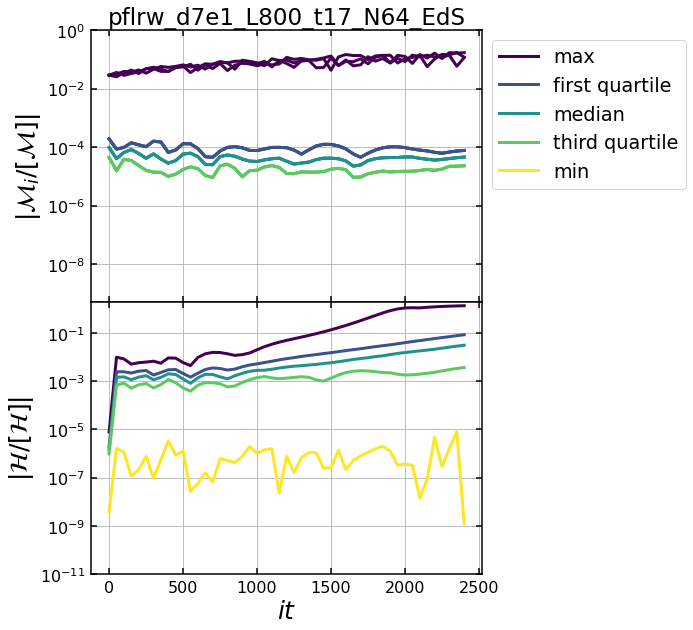

In [10]:
plot_constraints(fc3_N64, param_case3_N64)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


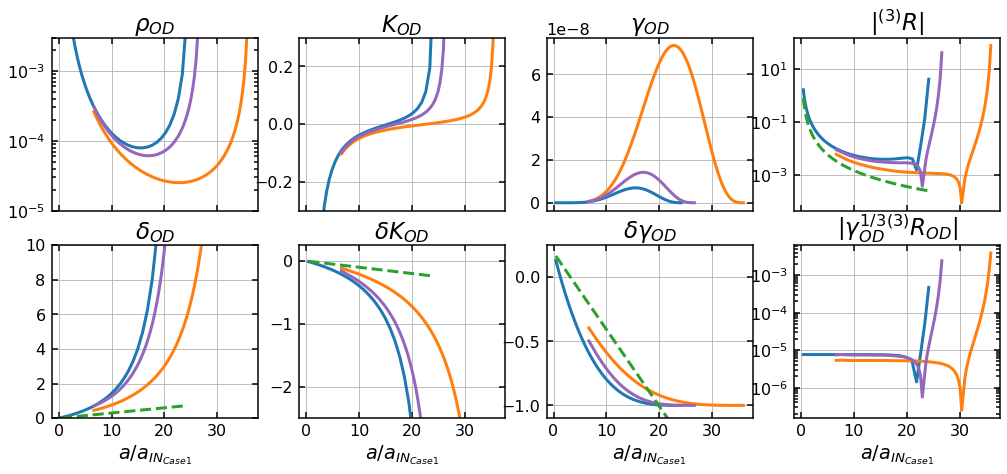

In [6]:
plt.figure(figsize=(17, 7))
ax1 = plt.subplot(241)
ax2 = plt.subplot(242)
ax3 = plt.subplot(243)
ax4 = plt.subplot(244)
ax5 = plt.subplot(245)
ax6 = plt.subplot(246)
ax7 = plt.subplot(247)
ax8 = plt.subplot(248)

for f, col in zip([f1TV_N64, f2_N64, f3_N64], ['C0', 'C1', 'C4']):
    try:
        an = f['an_av']
    except:
        an = Lin.an_initial(f['t'])
        
    try:
        ax1.semilogy(an, f['rho_OD'], color=col)
    except:
        ax1.semilogy(an, f['rho_u_OD'], color=col)
    ax2.plot(an, f['K_OD'], color=col)
    ax3.plot(an, f['gdet_OD'], color=col)
    ax4.semilogy(an, abs(f['RicciS_OD']), color=col)
    try:
        delta = f['drho_OD']
    except:
        delta = f['drho_u_OD']
    ax5.plot(an, delta, color=col)
    ax6.plot(an, f['dK_OD'], color=col)
    ax7.plot(an, f['dgdet_OD'], color=col)
    ax8.semilogy(an, abs((f['gdet_OD']**(1/3)) * f['RicciS_OD']), color=col)
        
ax1.grid()
ax1.set_title(r'$\rho_{OD}$')
ax1.set_ylim(1e-5, 3e-3)
ax1.set_xticklabels(['']*4)
ax2.grid()
ax2.set_title(r'$K_{OD}$')
ax2.set_ylim(-0.3, 0.3)
ax2.set_xticklabels(['']*4)
ax3.grid()
ax3.set_title(r'$\gamma_{OD}$')
ax3.set_xticklabels(['']*4)
ax4.grid()
ax4.set_title(r'$|{}^{(3)}R|$')
ax4.set_xticklabels(['']*4)
ax5.grid()
ax5.set_title(r'$\delta_{OD}$')
ax5.set_xlabel(r'$a/a_{{IN}_{Case1}}$')
ax5.set_ylim(0, 10)
ax6.grid()
ax6.set_title(r'$\delta K_{OD}$')
ax6.set_xlabel(r'$a/a_{{IN}_{Case1}}$')
ax6.set_ylim(-2.5, 0.25)
ax7.grid()
ax7.set_title(r'$\delta \gamma_{OD}$')
ax7.set_xlabel(r'$a/a_{{IN}_{Case1}}$')
ax7.set_ylim(-1.1, 0.25)
ax8.grid()
ax8.set_title(r'$|\gamma^{1/3}_{OD} {}^{(3)}R_{OD}|$')
ax8.set_xlabel(r'$a/a_{{IN}_{Case1}}$')

t = f1TV_N64['t']
an = Lin.an_initial(t)
ax4.plot(an, Lin.dRicciS(t, 'OD'), linestyle='--', color='C2')
ax5.plot(an, Lin.drho_u(t, 'OD'), linestyle='--', color='C2')
ax6.plot(an, Lin.dK(t, 'OD'), linestyle='--', color='C2')
ax7.plot(an, Lin.dgdet(t, 'OD'), linestyle='--', color='C2')

In [7]:
def linear_interp(x, y, xf):
    yf = np.zeros(len(xf))
    for i in range(len(xf)):
        idx = np.argmin(abs(x - xf[i]))
        if idx!=len(x)-1:
            a = (y[idx+1]-y[idx])/(x[idx+1]-x[idx])
        else:
            a = (y[idx]-y[idx-1])/(x[idx]-x[idx-1])
        b = y[idx] - a*x[idx]
        yf[i] = a*xf[i] + b
    return yf

Text(0.5, 0, '$a/a_{{IN}_{Case1}}$')

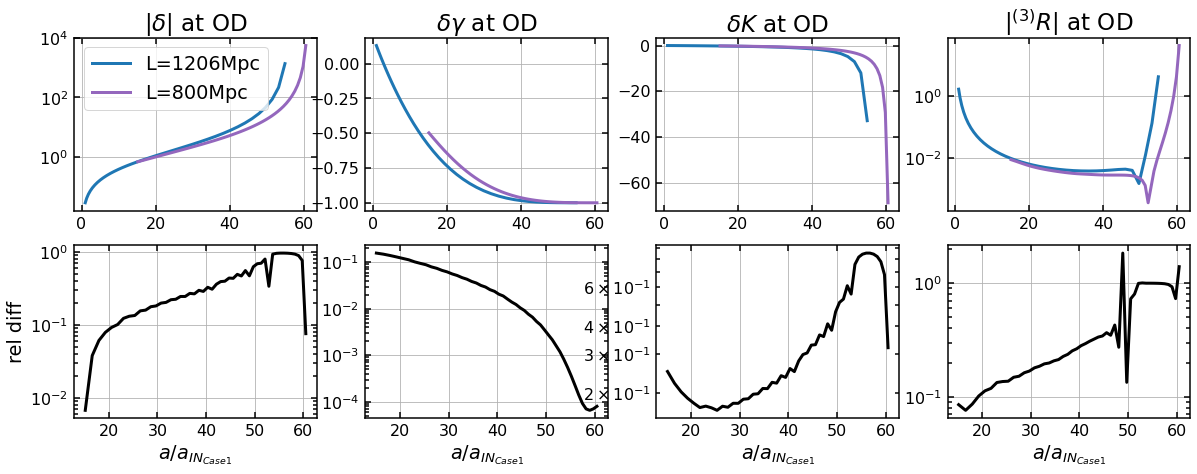

In [18]:
plt.figure(figsize=(20, 7))
fprev = f1TV_N64
fnew = f3_N64
anprev = f1TV_N64['a']/f1TV_N64['a'][0]
annew = f3_N64['a']/f1TV_N64['a'][0]
loc = 'OD'
colprev = 'C0'
colnew = 'C4'

dprev = abs(fprev['drho_u_'+loc])
dnew = abs(fnew['drho_u_'+loc])
ax1 = plt.subplot(241)
ax1.semilogy(anprev, dprev, color=colprev, label=r'L=1206Mpc')
ax1.semilogy(annew, dnew, color=colnew, label=r'L=800Mpc')
ax1.set_title(r'$|\delta|$ at '+loc)
ax1.grid()
ax1.legend()
ax2 = plt.subplot(245)
ax2.semilogy(annew, abs(dnew/linear_interp(anprev, dprev, annew)-1), color='k')
ax2.grid()
ax2.set_ylabel('rel diff')
ax2.set_xlabel(r'$a/a_{{IN}_{Case1}}$')

dprev = fprev['dgdet_'+loc]
dnew = fnew['dgdet_'+loc]
ax3 = plt.subplot(242)
ax3.plot(anprev, dprev, color=colprev)
ax3.plot(annew, dnew, color=colnew)
ax3.set_title(r'$\delta\gamma$ at '+loc)
ax3.grid()
ax4 = plt.subplot(246)
ax4.semilogy(annew, abs(dnew/linear_interp(anprev, dprev, annew)-1), color='k')
ax4.grid()
ax4.set_xlabel(r'$a/a_{{IN}_{Case1}}$')

dprev = fprev['dK_'+loc]
dnew = fnew['dK_'+loc]
ax3 = plt.subplot(243)
ax3.plot(anprev, dprev, color=colprev)
ax3.plot(annew, dnew, color=colnew)
ax3.set_title(r'$\delta K$ at '+loc)
ax3.grid()
ax4 = plt.subplot(247)
ax4.semilogy(annew, abs(dnew/linear_interp(anprev, dprev, annew)-1), color='k')
ax4.grid()
ax4.set_xlabel(r'$a/a_{{IN}_{Case1}}$')

dprev = abs(fprev['RicciS_'+loc])
dnew = abs(fnew['RicciS_'+loc])
ax3 = plt.subplot(244)
ax3.semilogy(anprev, dprev, color=colprev)
ax3.semilogy(annew, dnew, color=colnew)
ax3.set_title(r'$|{}^{(3)}R|$ at '+loc)
ax3.grid()
ax4 = plt.subplot(248)
ax4.semilogy(annew, abs(dnew/linear_interp(anprev, dprev, annew)-1), color='k')
ax4.grid()
ax4.set_xlabel(r'$a/a_{{IN}_{Case1}}$')